In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

---
# Acquiring data

In [3]:
df = pd.read_csv('titanic_train.csv')
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

## Discovering missing data

<AxesSubplot:>

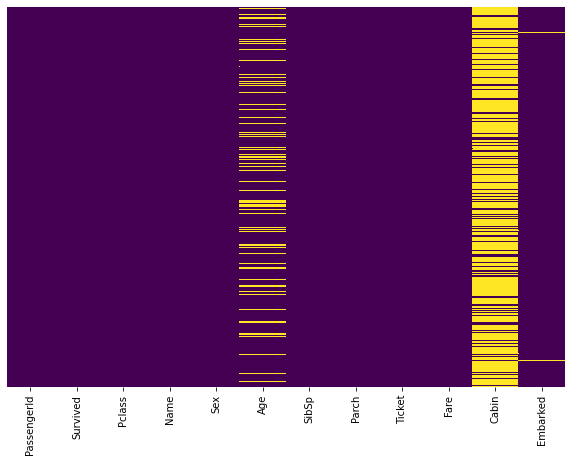

In [7]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

---
# Discovering the data

## _Exploratory data analysis_

In [8]:
sns.set_style('whitegrid')

**How many people survived:**

<AxesSubplot:xlabel='Survived', ylabel='count'>

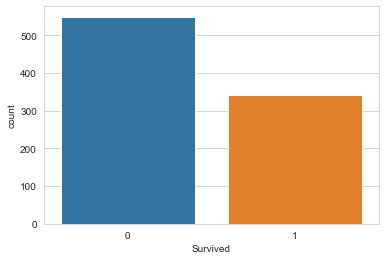

In [9]:
sns.countplot(x='Survived', data=df)

**Survivors by gender:**

<AxesSubplot:xlabel='Survived', ylabel='count'>

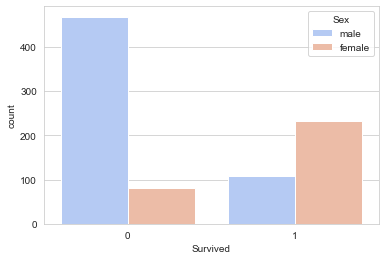

In [10]:
sns.countplot(x='Survived', data=df, hue='Sex', palette='coolwarm')

**Passengers' age by ticket class in terms of survival:**

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

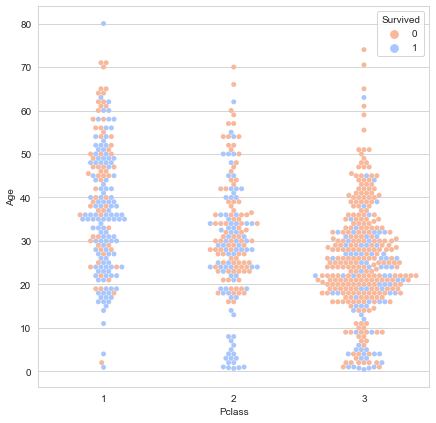

In [11]:
plt.figure(figsize=(7, 7))
sns.swarmplot(x='Pclass', y='Age', hue='Survived', data=df, palette='coolwarm_r')

**Passengers' age by ticket class:**

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

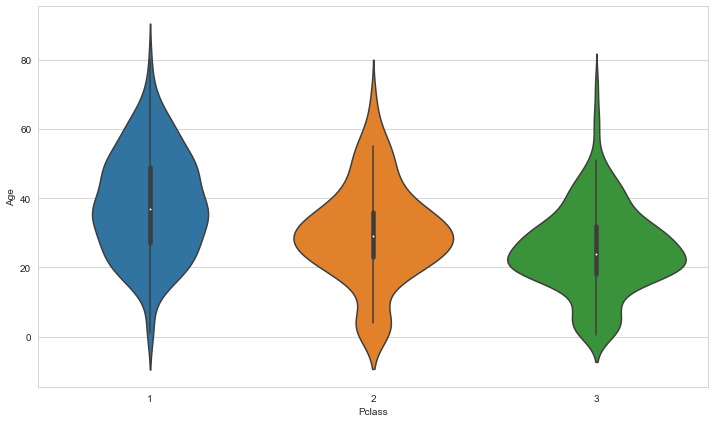

In [12]:
plt.figure(figsize=(12, 7))
sns.violinplot(x='Pclass', y='Age', data=df)

**Survivors by ticket class:**

<AxesSubplot:xlabel='Survived', ylabel='count'>

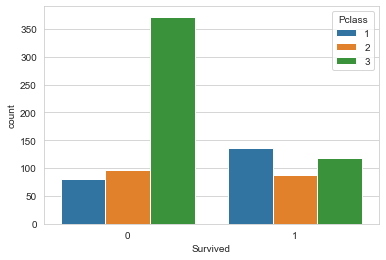

In [13]:
sns.countplot(x='Survived', data=df, hue='Pclass')

**Survival rate by ticket class in terms of passengers' age:**

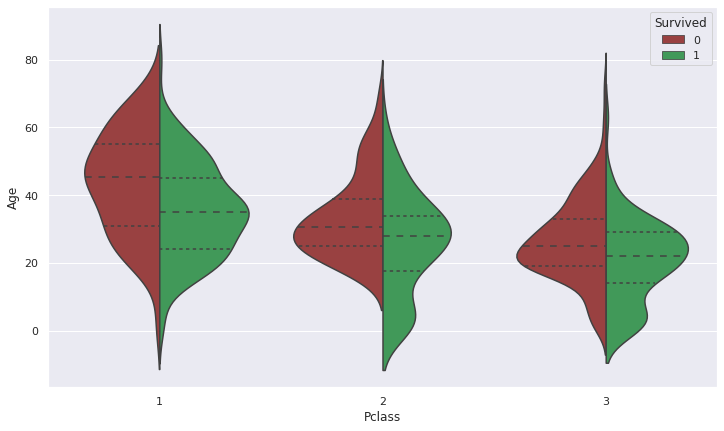

In [14]:
plt.figure(figsize=(12, 7))
colors = ['#a83232', '#32a852']
sns.set(color_codes=True)
sns.set_palette(sns.color_palette(colors))

sns.violinplot(x='Pclass', y='Age', data=df, hue='Survived', split=True, inner='quartile')
sns.reset_defaults()

**Passengers' age on the Titanic:**

<Figure size 700x400 with 0 Axes>

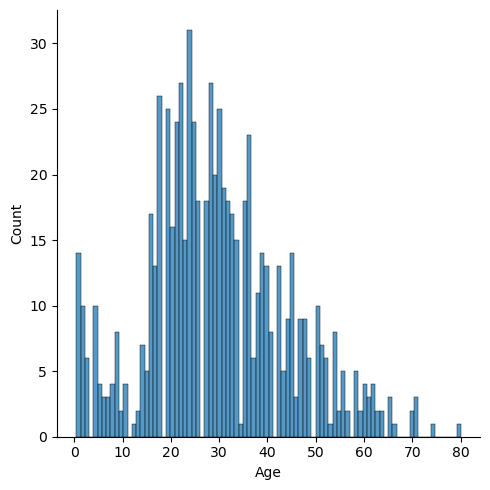

In [15]:
plt.figure(figsize=(7, 4))
sns.displot(x='Age', data=df, bins=90)

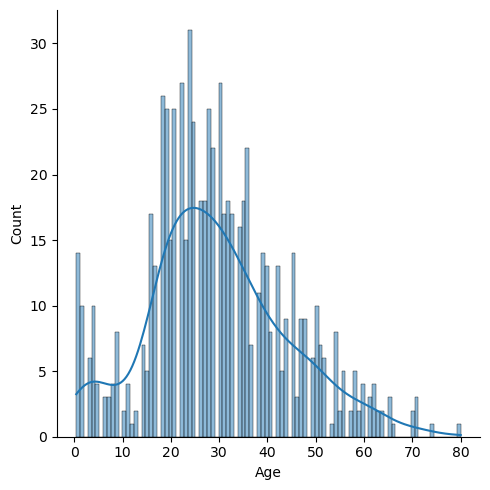

In [16]:
sns.displot(df['Age'].dropna(), kde=True, bins=100)

**The number of siblings and spouses passengers had on board:**

<AxesSubplot:xlabel='SibSp', ylabel='count'>

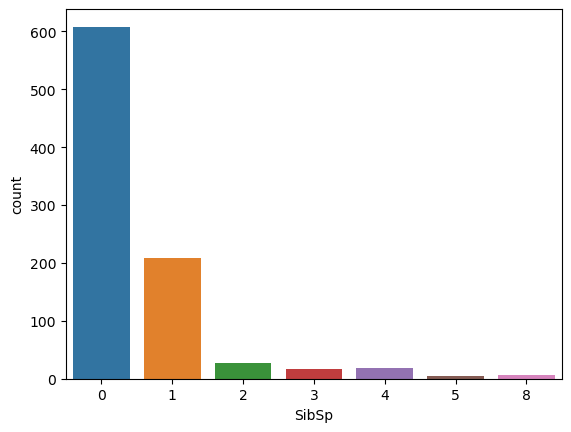

In [17]:
sns.countplot(x='SibSp', data=df)

**How much people paid for the fare:**

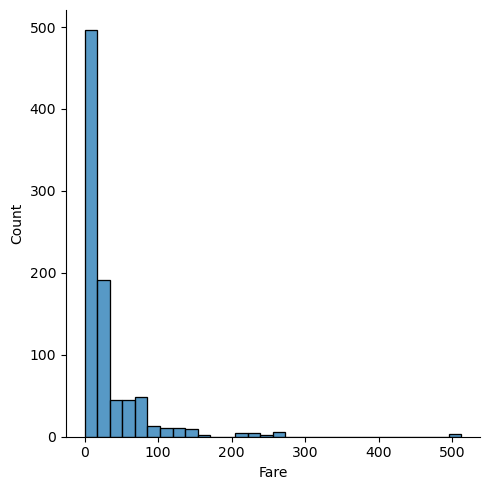

In [18]:
sns.displot(x='Fare', data=df, bins=30)

...Or...

In [19]:
import cufflinks as cf
cf.go_offline()

df['Fare'].iplot(kind='hist', bins=40)

In [20]:
df.groupby('Pclass').mean()['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

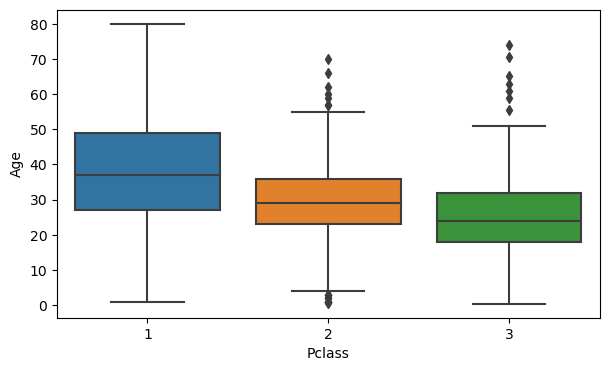

In [21]:
plt.figure(figsize=(7, 4))
sns.boxplot(x='Pclass', y='Age', data=df)

---
# Cleaning and imputing data

## _Introduce additional columns_

In [22]:
df = pd.read_csv('titanic_train.csv')
df['Family Size'] = df['Parch'] + df['SibSp']
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Family Size Title  
0      0         A/5 21171   7.2500   NaN        S            1    Mr  
1      0          PC 17599  71.2833   C85        C            1   Mrs  
2      0  STON/O2. 3101282   7.9250   NaN        S            0  Miss  
3      0            113803  53.1000  C123        S            1   Mrs  
4      0            373450   8.0500   NaN        S            0    Mr

## _Additional data analysis_

**Common men on board who were single vs married (or had 1 sibling):** 

<AxesSubplot:xlabel='SibSp', ylabel='count'>

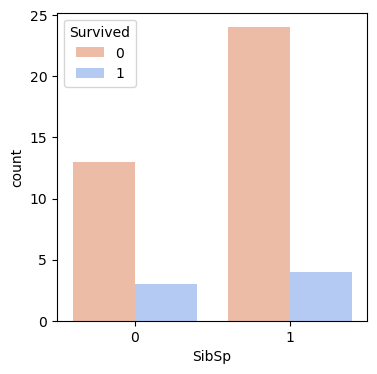

In [23]:
single_and_married_men = df[(df['Title'] == 'Mr') & (df['Parch'] > 0) & (df['SibSp'] < 2)]

plt.figure(figsize=(4, 4))
sns.countplot(x='SibSp', data = single_and_married_men, hue='Survived', palette='coolwarm_r')

<AxesSubplot:xlabel='SibSp', ylabel='Age'>

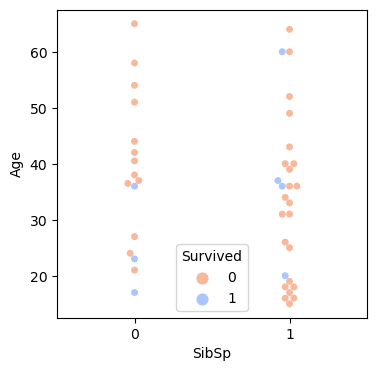

In [24]:
plt.figure(figsize=(4, 4))
sns.swarmplot(x='SibSp', y='Age', hue='Survived', data=single_and_married_men, palette='coolwarm_r')

<Figure size 700x400 with 0 Axes>

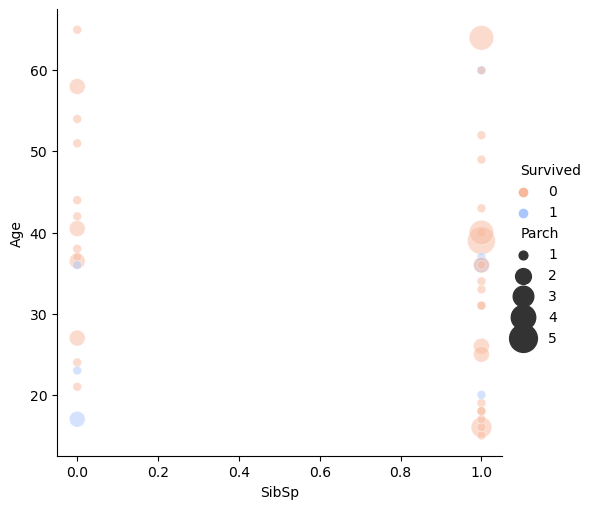

In [25]:
plt.figure(figsize=(7, 4))
sns.relplot(x='SibSp', y='Age', hue='Survived', data=single_and_married_men, palette='coolwarm_r', size='Parch', sizes=(40, 400), alpha=.5)

**Common men with children on board survival rate:**

<AxesSubplot:xlabel='Parch', ylabel='count'>

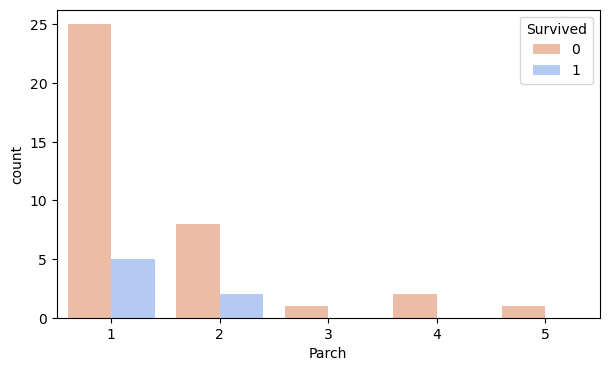

In [26]:
plt.figure(figsize=(7, 4))
sns.countplot(x='Parch', data = single_and_married_men, hue='Survived', palette='coolwarm_r')

## _Imputing missing values_

<AxesSubplot:>

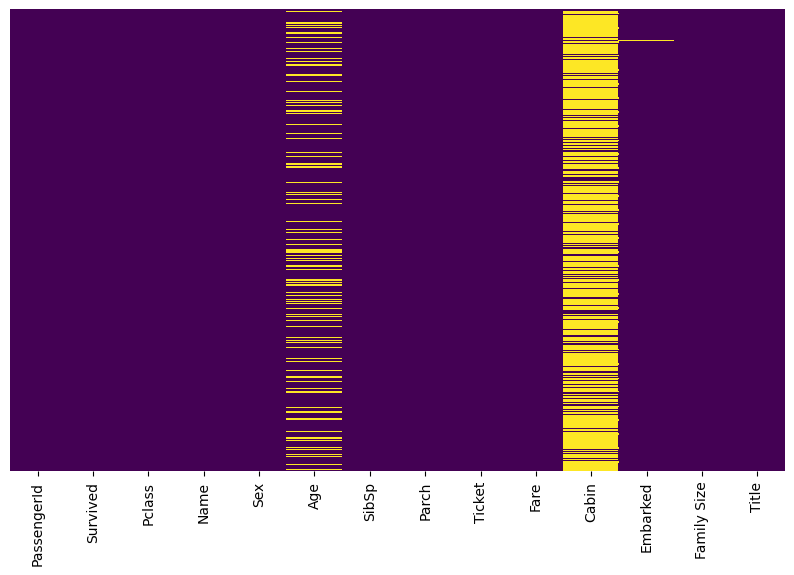

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Impute age

In [28]:
#children
childrens_median_age = df[df['Title'] == 'Master']['Age'].median()
df.loc[(df['Title'] == 'Master') & (df['Age'].isna()), 'Age'] = childrens_median_age

#wives
wives_median_age = df[df['Title'] == 'Mrs']['Age'].median()
df.loc[(df['Title'] == 'Mrs') & (df['Age'].isna()), 'Age'] = wives_median_age

#fathers
fathers_median_age = df[(df['Title'] == 'Mr') & (df['Parch'] > 0)]['Age'].median()
df.loc[(df['Title'] == 'Mr') & (df['Age'].isna()) & (df['Parch'] > 0), 'Age'] = fathers_median_age

#gentlemen
gentlemens_median_age = df[df['Title'] == 'Mr']['Age'].median()
df.loc[(df['Title'] == 'Mr') & (df['Age'].isna()), 'Age'] = gentlemens_median_age

#ladies travelling alone
ladies_travelling_alone = pd.concat([df[(df['Title'] == "Miss") & (df['Parch'] + df['SibSp'] == 0)], df[(df['Title'] == 'Ms') & (df['Parch'] + df['SibSp'] == 0)]])
df.loc[(df['Title'] == 'Miss') & (df['Title'] == 'Ms'), 'Age'] = ladies_travelling_alone['Age'].median()

#ladies travelling with company 
ladies_median_age = df[(df['Title'] == "Miss") | (df['Title'] == 'Ms')]['Age'].median()
df.loc[(df['Title'] == 'Miss') | (df['Title'] == 'Ms'), 'Age'] = ladies_median_age

#doctors
doctors_median_age = df[df['Title'] == 'Dr']['Age'].median()
df.loc[(df['Title'] == 'Dr') & (df['Age'].isna()), 'Age'] = doctors_median_age

print('children\'s median age:', childrens_median_age)
print('wives\' median age:', wives_median_age)
print('fathers\' median age:', fathers_median_age)
print('gentlemen\'s median age:', gentlemens_median_age)
print('ladies\' median age:', ladies_median_age)
print('ladies travelling alone median age:', ladies_travelling_alone['Age'].median())
print('doctors\' median age:', doctors_median_age)

children's median age: 3.5
wives' median age: 35.0
fathers' median age: 35.0
gentlemen's median age: 30.0
ladies' median age: 21.0
ladies travelling alone median age: 26.0
doctors' median age: 46.5


In [29]:
most_common_city = df['Embarked'].mode()[0]
df.loc[df['Embarked'].isna(), 'Embarked'] = most_common_city

<AxesSubplot:>

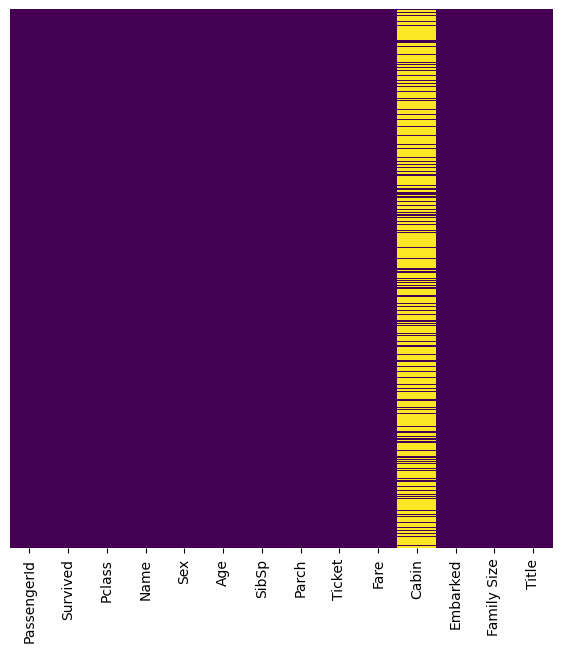

In [30]:
plt.figure(figsize=(7, 7))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [31]:
df.drop('Cabin', axis=1, inplace=True)

<AxesSubplot:>

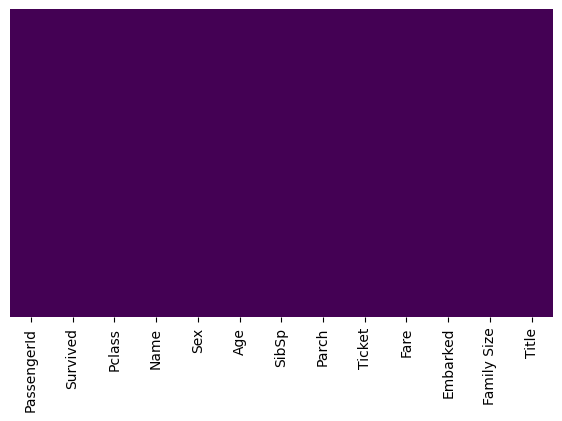

In [32]:
plt.figure(figsize=(7, 4))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Drop any more missing values.

In [33]:
df.dropna(inplace=True)

## _Processing categorical features_

In [34]:
gender = pd.get_dummies(df['Sex'], drop_first=True)
gender.head()

male
0     1
1     0
2     0
3     0
4     1

In [35]:
embarked = pd.get_dummies(df['Embarked'], drop_first=True)
embarked

Q  S
0    0  1
1    0  0
2    0  1
3    0  1
4    0  1
..  .. ..
886  0  1
887  0  1
888  0  1
889  0  0
890  1  0

[891 rows x 2 columns]

In [36]:
titles_indicator = pd.get_dummies(df['Title'], drop_first=True)
titles_indicator

Col  Don  Dr  Jonkheer  Lady  Major  Master  Miss  Mlle  Mme  Mr  Mrs  \
0      0    0   0         0     0      0       0     0     0    0   1    0   
1      0    0   0         0     0      0       0     0     0    0   0    1   
2      0    0   0         0     0      0       0     1     0    0   0    0   
3      0    0   0         0     0      0       0     0     0    0   0    1   
4      0    0   0         0     0      0       0     0     0    0   1    0   
..   ...  ...  ..       ...   ...    ...     ...   ...   ...  ...  ..  ...   
886    0    0   0         0     0      0       0     0     0    0   0    0   
887    0    0   0         0     0      0       0     1     0    0   0    0   
888    0    0   0         0     0      0       0     1     0    0   0    0   
889    0    0   0         0     0      0       0     0     0    0   1    0   
890    0    0   0         0     0      0       0     0     0    0   1    0   

     Ms  Rev  Sir  the Countess  
0     0    0    0             0  
1     0    0    0             0  
2     0    0    0             0  
3     0    0    0             0  
4     0    0    0             0  
..   ..  ...  ...           ...  
886   0    1    0             0  
887   0    0    0             0  
888   0    0    0             0  
889   0    0    0             0  
890   0    0    0             0  

[891 rows x 16 columns]

## _Concatenate catagorical indicator features to the dataset_
Add the new columns to the dataframe.

In [37]:
df = pd.concat([df, gender, embarked, titles_indicator], axis=1)
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  21.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare  ... Master  Miss Mlle  Mme  Mr  Mrs  Ms  \
0      0         A/5 21171   7.2500  ...      0     0    0    0   1    0   0   
1      0          PC 17599  71.2833  ...      0     0    0    0   0    1   0   
2      0  STON/O2. 3101282   7.9250  ...      0     1    0    0   0    0   0   
3      0            113803  53.1000  ...      0     0    0    0   0    1   0   
4      0            373450   8.0500  ...      0     0    0    0   1    0   0   

   Rev  Sir  the Countess  
0    0    0             0  
1    0    0             0  
2    0    0             0  
3    0    0             0  
4    0    0             0  

[5 rows x 32 columns]

## _Filter for relevant data_

Now we drop all the columns that we cannot use in our prediction model.

In [38]:
df.drop(['PassengerId', 'Sex', 'Embarked', 'Name', 'Ticket', 'Title'], axis=1, inplace=True)

In [39]:
df

Survived  Pclass   Age  SibSp  Parch     Fare  Family Size  male  Q  S  \
0           0       3  22.0      1      0   7.2500            1     1  0  1   
1           1       1  38.0      1      0  71.2833            1     0  0  0   
2           1       3  21.0      0      0   7.9250            0     0  0  1   
3           1       1  35.0      1      0  53.1000            1     0  0  1   
4           0       3  35.0      0      0   8.0500            0     1  0  1   
..        ...     ...   ...    ...    ...      ...          ...   ... .. ..   
886         0       2  27.0      0      0  13.0000            0     1  0  1   
887         1       1  21.0      0      0  30.0000            0     0  0  1   
888         0       3  21.0      1      2  23.4500            3     0  0  1   
889         1       1  26.0      0      0  30.0000            0     1  0  0   
890         0       3  32.0      0      0   7.7500            0     1  1  0   

     ...  Master  Miss  Mlle  Mme  Mr  Mrs  Ms  Rev  Sir  the Countess  
0    ...       0     0     0    0   1    0   0    0    0             0  
1    ...       0     0     0    0   0    1   0    0    0             0  
2    ...       0     1     0    0   0    0   0    0    0             0  
3    ...       0     0     0    0   0    1   0    0    0             0  
4    ...       0     0     0    0   1    0   0    0    0             0  
..   ...     ...   ...   ...  ...  ..  ...  ..  ...  ...           ...  
886  ...       0     0     0    0   0    0   0    1    0             0  
887  ...       0     1     0    0   0    0   0    0    0             0  
888  ...       0     1     0    0   0    0   0    0    0             0  
889  ...       0     0     0    0   1    0   0    0    0             0  
890  ...       0     0     0    0   1    0   0    0    0             0  

[891 rows x 26 columns]

---
# Regular Gradient Boosting
## _The model_

In [40]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=666)

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

## _Experimenting with different learning rates_

In [68]:
learning_rates = np.arange(.01, 1, .01).round(2)
learning_rates

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

In [69]:
accuracies = pd.DataFrame(columns=['Learning Rate', 'Accuracy on Training Data', 'Accuracy on Test Data'])
accuracies['Learning Rate'] = learning_rates
accuracies

Learning Rate Accuracy on Training Data Accuracy on Test Data
0            0.01                       NaN                   NaN
1            0.02                       NaN                   NaN
2            0.03                       NaN                   NaN
3            0.04                       NaN                   NaN
4            0.05                       NaN                   NaN
..            ...                       ...                   ...
94           0.95                       NaN                   NaN
95           0.96                       NaN                   NaN
96           0.97                       NaN                   NaN
97           0.98                       NaN                   NaN
98           0.99                       NaN                   NaN

[99 rows x 3 columns]

In [73]:
accuracies_on_test = []
accuracies_on_training = []

for learning_rate in learning_rates:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)
    
    accuracies_on_training.append(gb_clf.score(X_train, y_train))
    accuracies_on_test.append(gb_clf.score(X_test, y_test))
    
accuracies['Accuracy on Training Data'] = accuracies_on_training
accuracies['Accuracy on Test Data'] = accuracies_on_test

accuracies

Learning Rate  Accuracy on Training Data  Accuracy on Test Data
0            0.01                   0.629213               0.596639
1            0.02                   0.629213               0.596639
2            0.03                   0.629213               0.596639
3            0.04                   0.644195               0.613445
4            0.05                   0.696629               0.652661
..            ...                        ...                    ...
94           0.95                   0.838951               0.798319
95           0.96                   0.838951               0.798319
96           0.97                   0.838951               0.798319
97           0.98                   0.838951               0.798319
98           0.99                   0.838951               0.798319

[99 rows x 3 columns]

<AxesSubplot:xlabel='Learning Rate'>

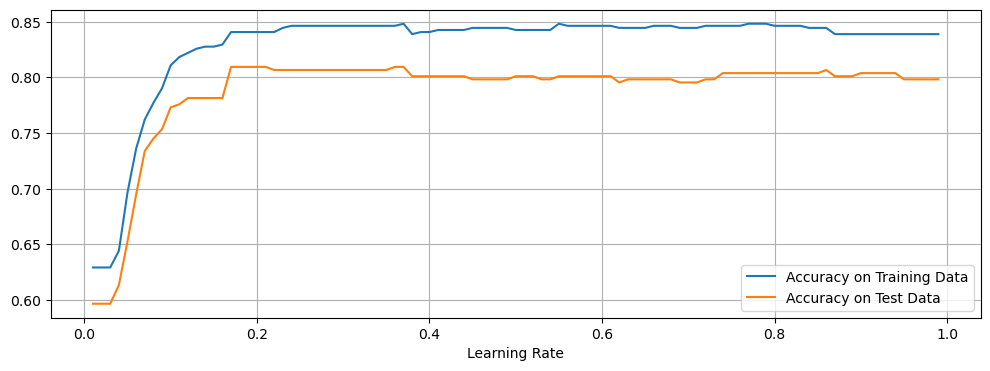

In [75]:
accuracies.plot(x='Learning Rate', y=['Accuracy on Training Data', 'Accuracy on Test Data'], grid=True, figsize=(12, 4))

## _Picking a learning rate and make predictions_
Query the learning rate with maximum accuracy on both training and test data: 

In [82]:
accuracies[(accuracies['Accuracy on Training Data'] == accuracies['Accuracy on Training Data'].max()) & (accuracies['Accuracy on Test Data'] == accuracies['Accuracy on Test Data'].max())]

Learning Rate  Accuracy on Training Data  Accuracy on Test Data
36           0.37                   0.848315               0.809524

In [83]:
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=.37, max_features=2, max_depth=4, random_state=0)
gb_clf.fit(X_train, y_train)

predictions = gb_clf.predict(X_test)

## _Evaluation_
Confusion matrices and precision-recall-F1 score are a good way to see how a logistic regression model perform.

In [84]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.91      0.85       213
           1       0.83      0.68      0.75       144

    accuracy                           0.82       357
   macro avg       0.82      0.79      0.80       357
weighted avg       0.82      0.82      0.81       357



In [85]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions)

array([[193,  20],
       [ 46,  98]], dtype=int64)

<AxesSubplot:>

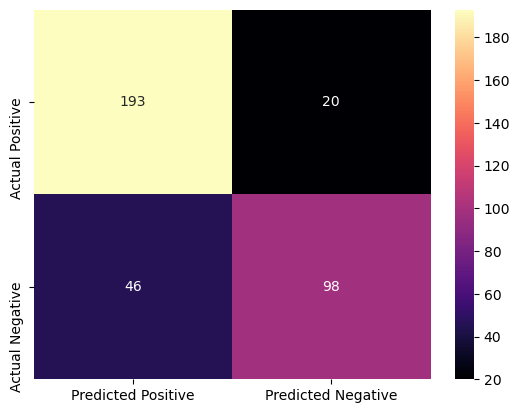

In [86]:
conf_matrix = confusion_matrix(y_test, predictions)

cm = pd.DataFrame(conf_matrix, index=['Actual Positive', 'Actual Negative'], columns=['Predicted Positive', 'Predicted Negative'])

sns.heatmap(cm, annot=True, fmt='d', cmap='magma')

# XGBoost
## _The model_

In [49]:
from xgboost import XGBClassifier

In [87]:
xgb_clf = XGBClassifier(subsample=.3)
xgb_clf.fit(X_train, y_train)

[19:00:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\fazek\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.3,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [88]:
score = xgb_clf.score(X_test, y_test)
score

0.8235294117647058

In [89]:
predictions2 = xgb_clf.predict(X_test)

## _Evaluation_

In [90]:
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       213
           1       0.83      0.71      0.76       144

    accuracy                           0.82       357
   macro avg       0.82      0.80      0.81       357
weighted avg       0.82      0.82      0.82       357



In [91]:
confusion_matrix(y_test, predictions2)

array([[192,  21],
       [ 42, 102]], dtype=int64)

<AxesSubplot:>

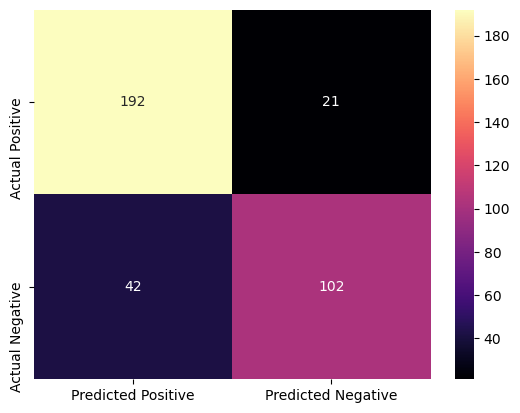

In [92]:
conf_matrix2 = confusion_matrix(y_test, predictions2)

cm2 = pd.DataFrame(conf_matrix2, index=['Actual Positive', 'Actual Negative'], columns=['Predicted Positive', 'Predicted Negative'])

sns.heatmap(cm2, annot=True, fmt='d', cmap='magma')